# <center>Bengaluru House Price Prediction

<img src='https://github.com/vishnuprasad77/ML-Projects/blob/main/project1/chuttersnap-awL_YCtPGv4-unsplash.jpg?raw=1'>

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('./Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Data Cleaning

In [6]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
df['society'].fillna(value=df['society'])

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object

In [9]:
df['balcony'].fillna(value=df['balcony'].mean())

0        1.000000
1        3.000000
2        3.000000
3        1.000000
4        1.000000
           ...   
13315    0.000000
13316    1.584376
13317    1.000000
13318    1.000000
13319    1.000000
Name: balcony, Length: 13320, dtype: float64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().mean()*100

area_type       0.0
availability    0.0
location        0.0
size            0.0
society         0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

### Data Visualization

#### Box Plot

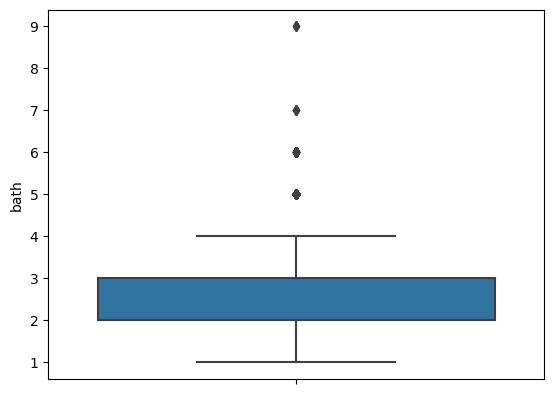

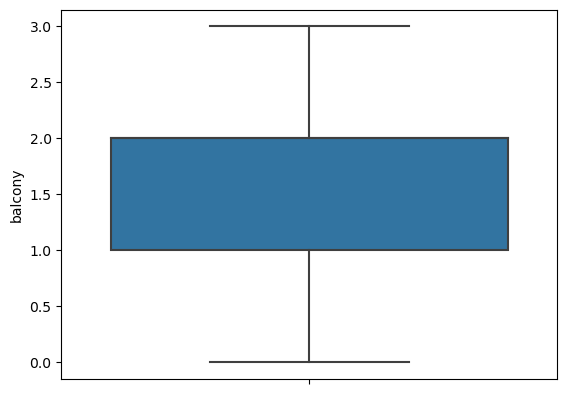

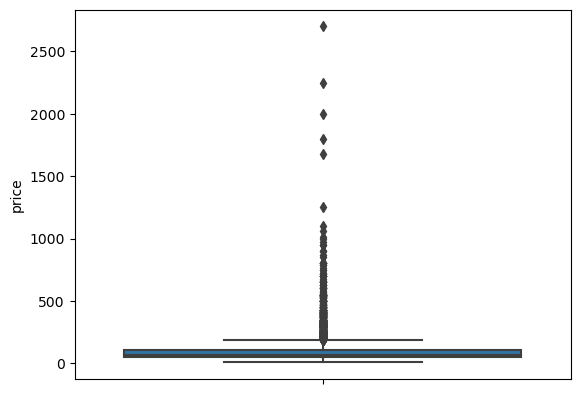

In [12]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show()

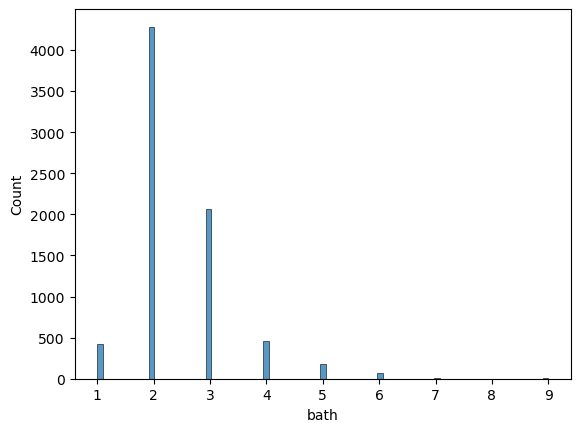

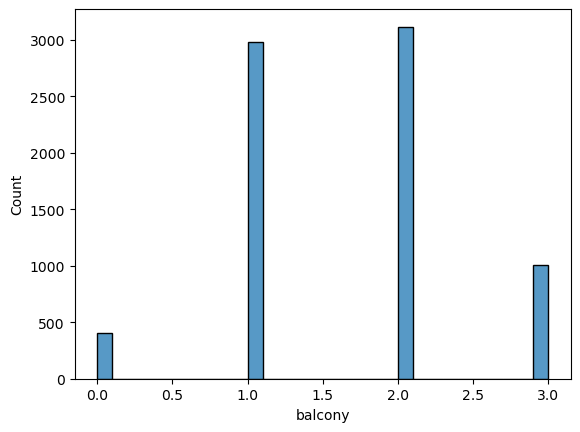

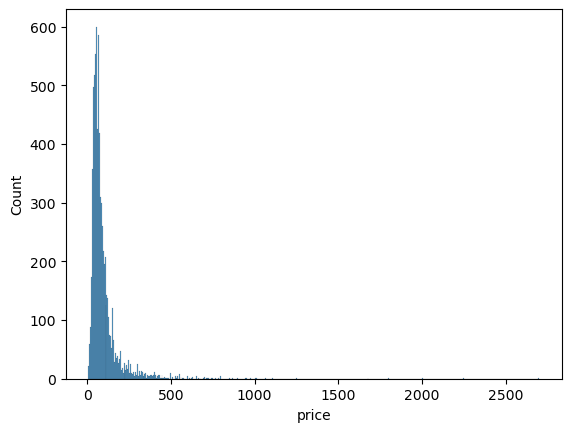

In [13]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.histplot(x=df[i])
        plt.show()

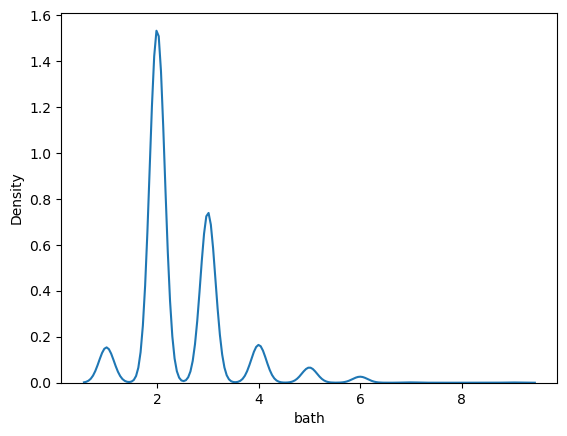

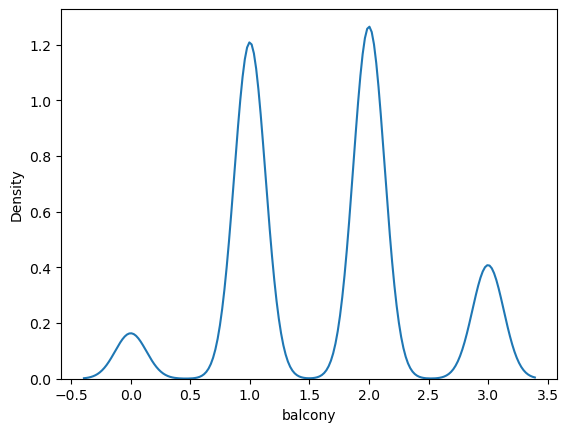

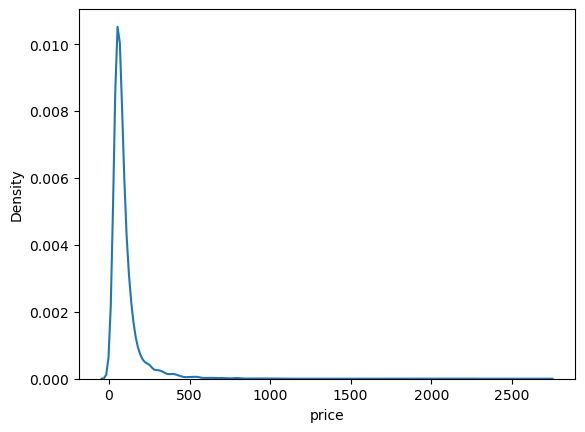

In [14]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.kdeplot(x=df[i])
        plt.show()

In [15]:
df.size=df['size'].str.replace('BHK','')
df.size=df['size'].str.replace('Bedroom','')
df.size=df['size'].str.replace('RK','').astype(float)

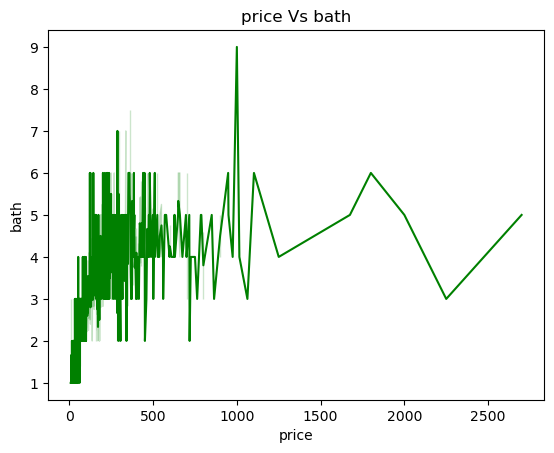

In [16]:
plt.title('price Vs bath')
sns.lineplot('price','bath',data=df,color='Green')
plt.show()

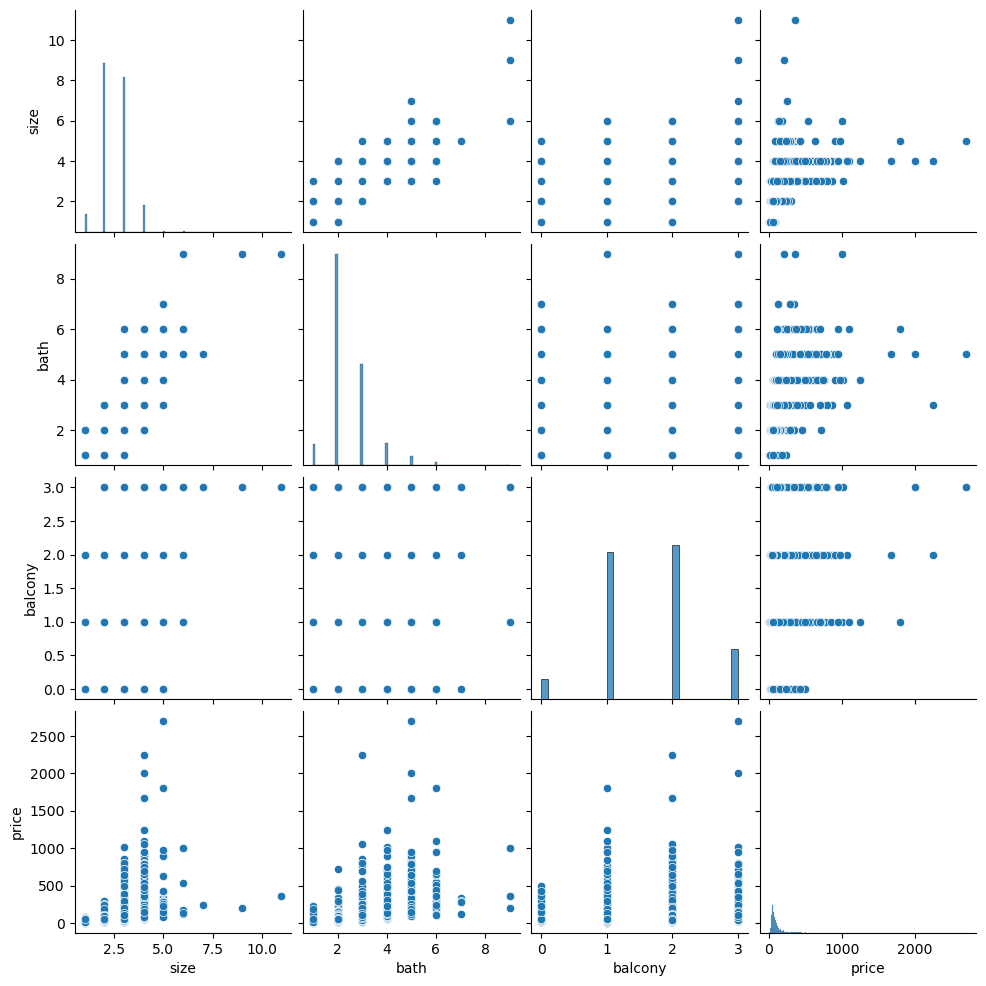

In [17]:
sns.pairplot(df)

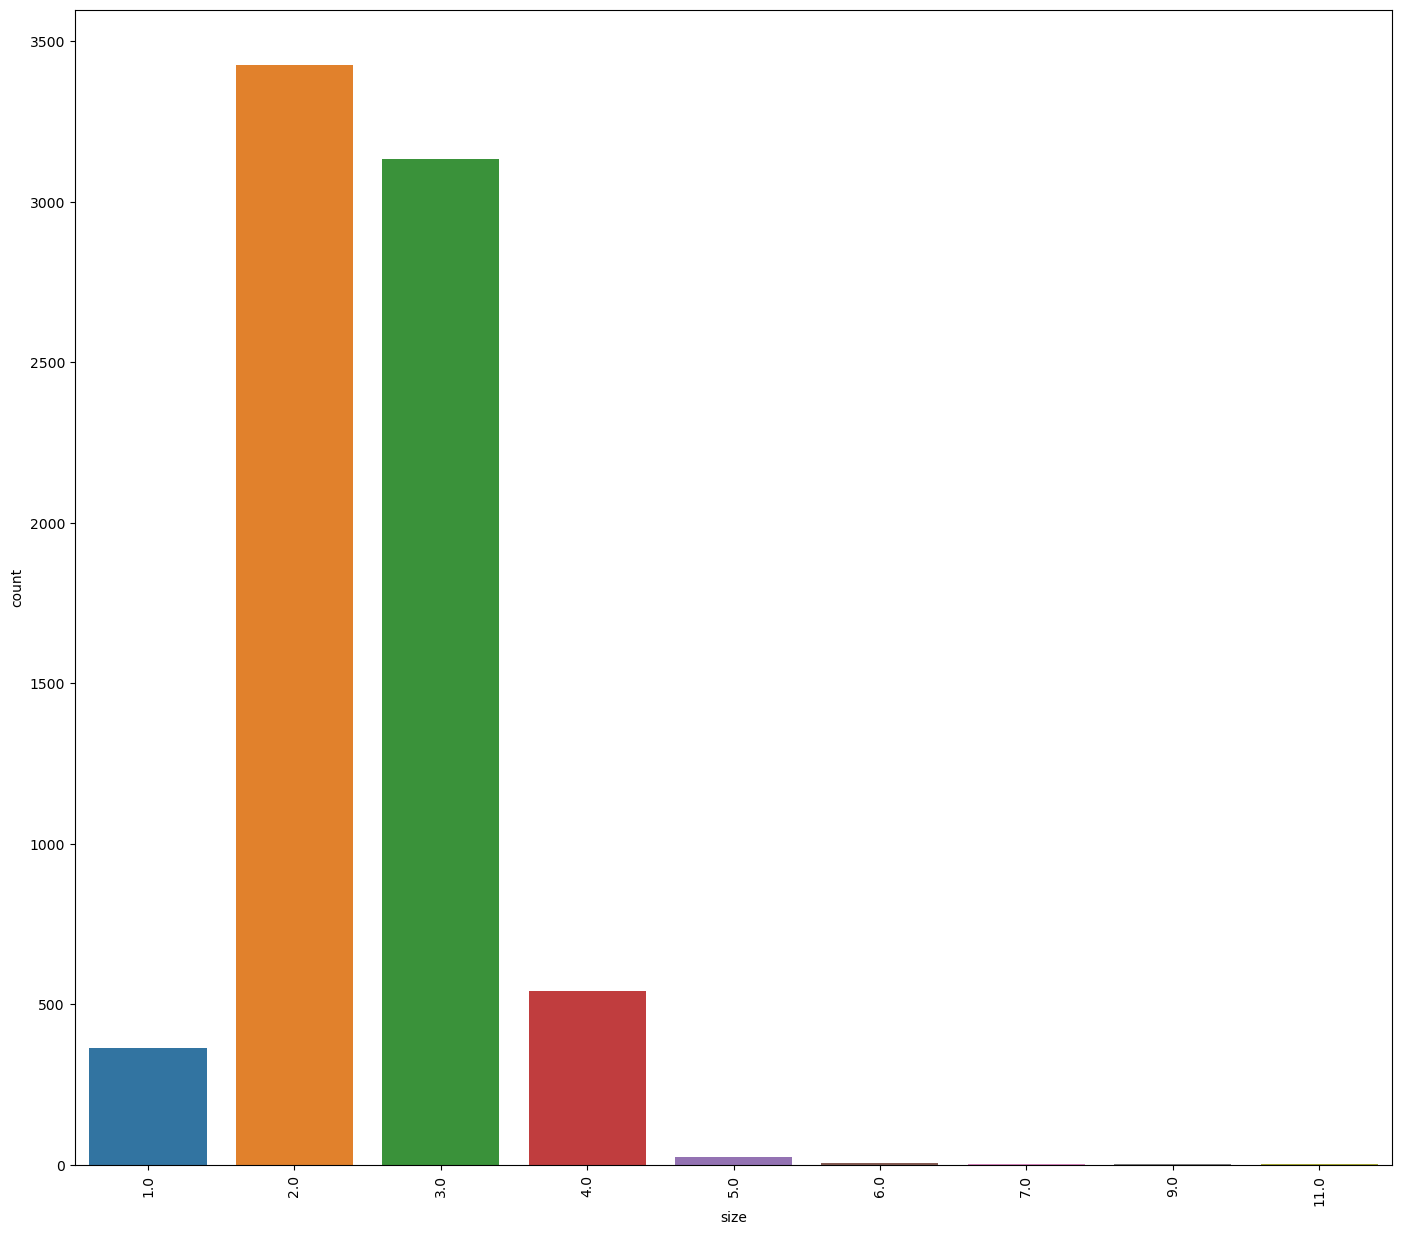

In [18]:
plt.figure(figsize=(17,15))
sns.countplot('size',data=df)
plt.xticks(rotation=90)
plt.show()

<Figure size 1700x1500 with 0 Axes>

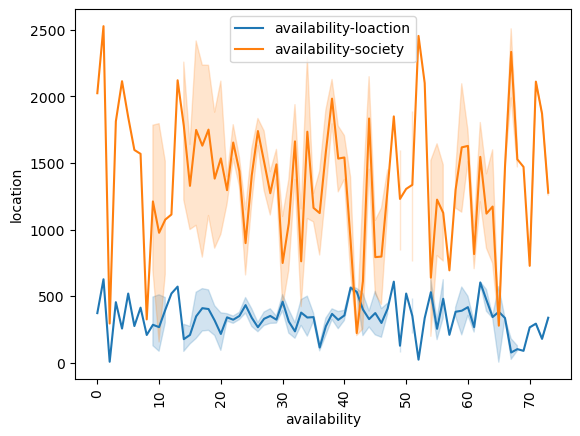

In [40]:
plt.figure(figsize=(17,15))
ax=plt.subplots()
ax=sns.lineplot(x='availability',y='location',data=df,label='availability-loaction')
ax1=sns.lineplot(x='availability',y='society',data=df,label='availability-society')
plt.xticks(rotation=90)
plt.show()

In [20]:
le = LabelEncoder()
df['area_type'] = le.fit_transform(df['area_type'])
df['availability'] = le.fit_transform(df['availability'])
df['location'] = le.fit_transform(df['location'])
df['society'] = le.fit_transform(df['society'])

<AxesSubplot:xlabel='availability', ylabel='location'>

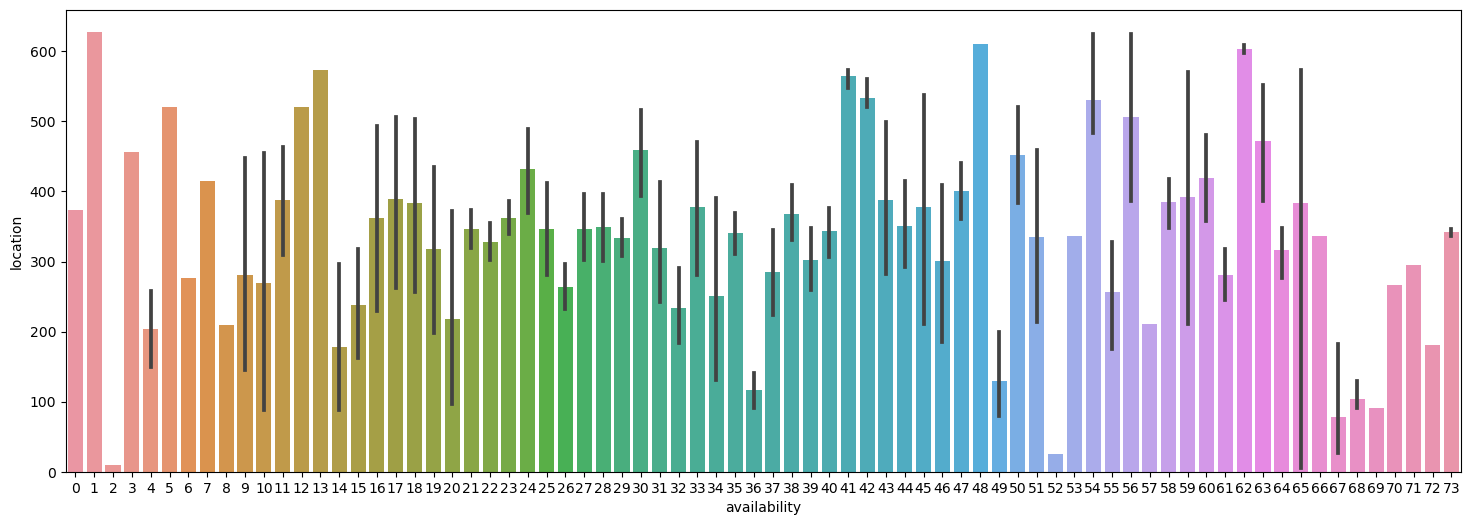

In [21]:
plt.figure(figsize=(18,6))
sns.barplot(x='availability',y='location',data=df)

In [57]:
myexplode = [.1,.1,.1,.1]

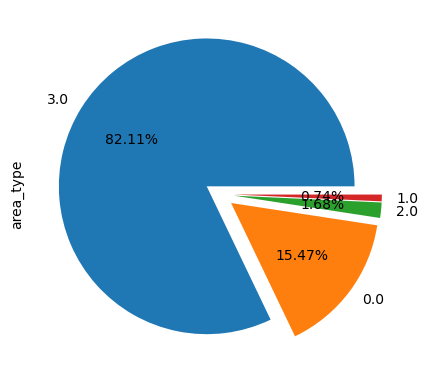

In [58]:
df.area_type.value_counts().plot.pie(autopct='%1.2f%%', explode = myexplode);

#### Find and Remove Outlier

In [23]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [24]:
for column in df.columns:
    if df[column].dtype != 'object':
        UL,LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

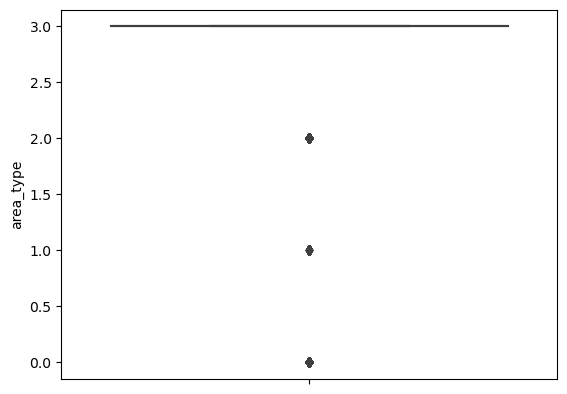

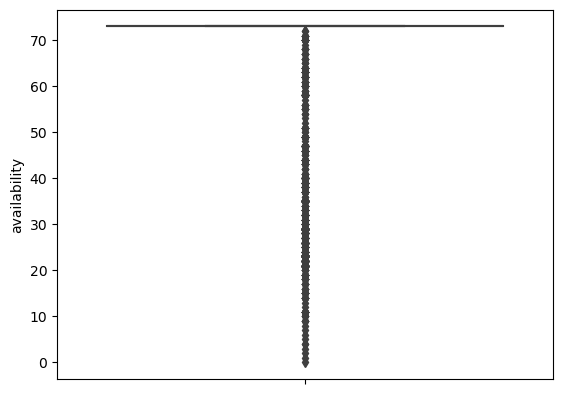

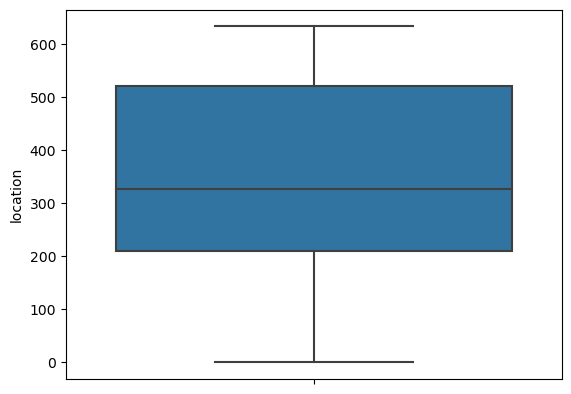

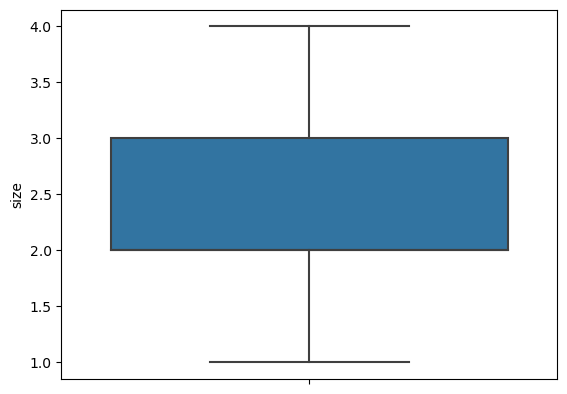

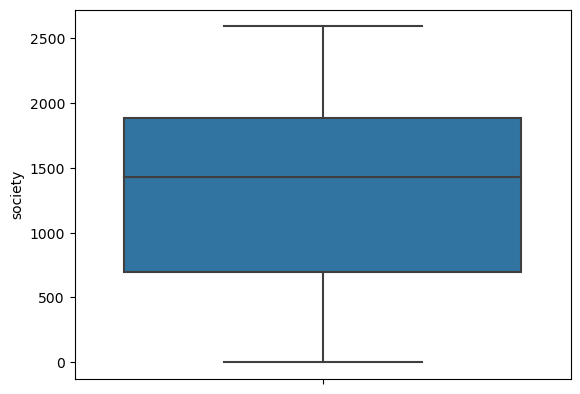

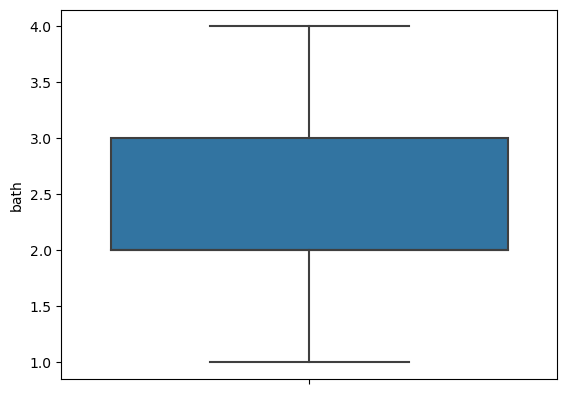

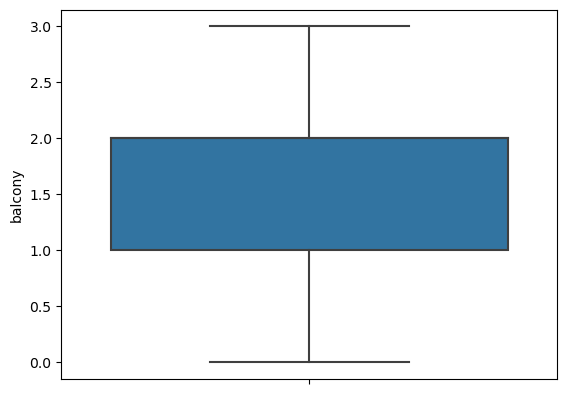

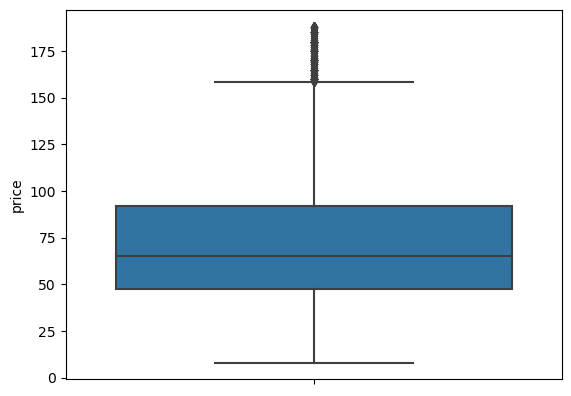

In [25]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show()

In [26]:
df.dropna(inplace=True)

In [27]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3.0,35.0,210.0,2.0,443.0,1056,2.0,1.0,39.07
3,3.0,73.0,387.0,3.0,2109.0,1521,3.0,1.0,95.00
5,3.0,73.0,625.0,2.0,585.0,1170,2.0,1.0,38.00
12,3.0,73.0,24.0,2.0,2015.0,1000,2.0,1.0,38.00
14,2.0,73.0,520.0,3.0,2075.0,2250,3.0,2.0,148.00
...,...,...,...,...,...,...,...,...,...
13304,3.0,73.0,490.0,2.0,777.0,1187,2.0,2.0,40.14
13308,0.0,73.0,91.0,3.0,262.0,1527,3.0,1.0,142.00
13313,3.0,73.0,590.0,3.0,100.0,1345,2.0,1.0,57.00
13314,3.0,73.0,234.0,3.0,2148.0,1715,3.0,3.0,112.00


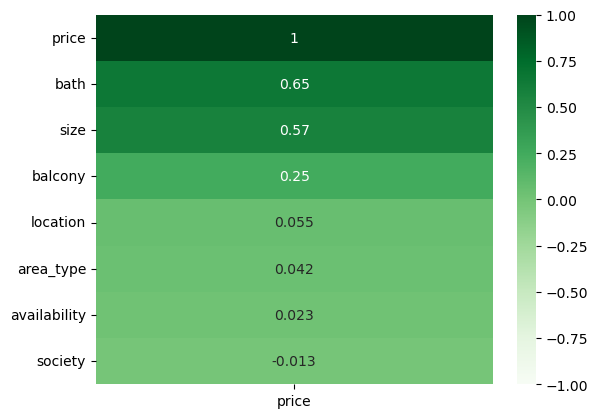

In [28]:
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

In [29]:
x= df[['bath','size','balcony','location','area_type','availability','society']].values
y = df[['price']].values

In [30]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### Finding the best model using Cross validation

In [31]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [32]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  26.16160232130448
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  26.16159814213568
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  26.571569158257642
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  24.242618093914555
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  22.869929753904717
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  27.027521408499886
********************************************

#### Splitting the data into training and testing

In [33]:
model = RandomForestRegressor()

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [35]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
y_pred = model.predict(x)
result = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)
result.sample(5)

,ACTUAL,PREDICTION
2424,34.98,38.419409
5354,32.92,31.046427
4852,39.00,39.664290
773,56.00,55.146467
654,50.00,49.716500


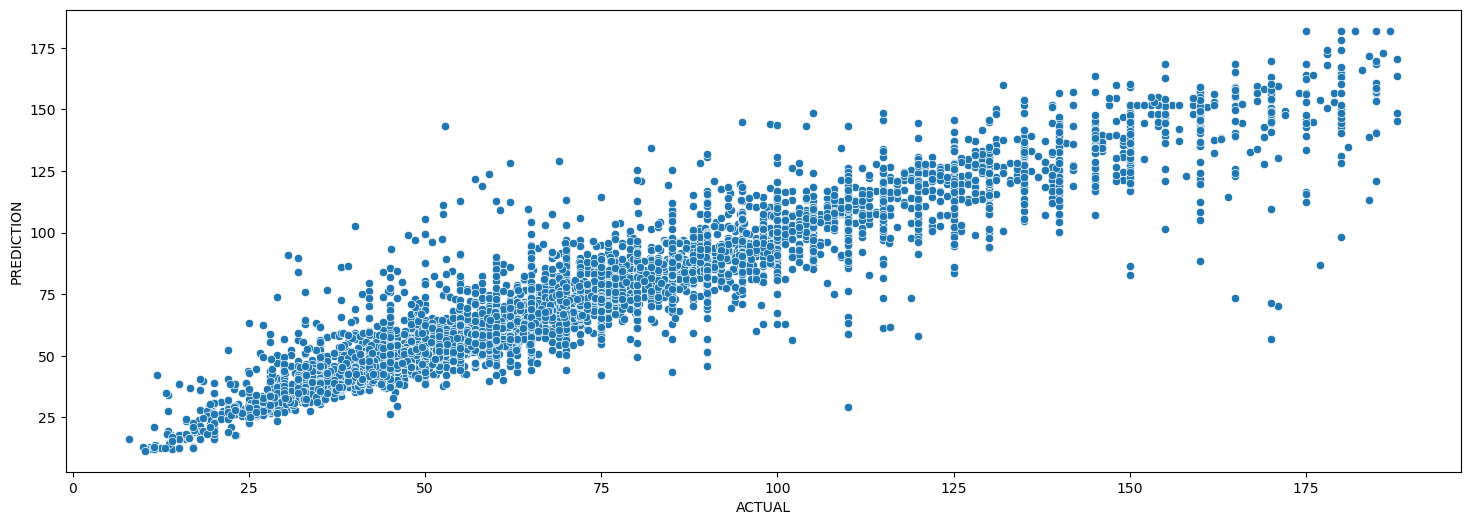

In [37]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='ACTUAL', y='PREDICTION', data=result);

In [38]:
model.score(x,y)

0.8959945304135469